<a href="https://colab.research.google.com/github/datagrad/EDA-of-Bank-Telemarketing-Campaign/blob/main/Bank_TeleMarketing_Campaign_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [22]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")


In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

#### 1. Read CSV FILE


In [24]:
#read the data set of "bank telemarketing campaign" in df.
df= pd.read_csv("https://raw.githubusercontent.com/datagrad/EDA-of-Bank-Telemarketing-Campaign/main/bank_marketing_updated_v1.csv?token=GHSAT0AAAAAABT3FJQMBRCCFK2Z5F4BT3TKYTTSUHA")


In [25]:
#Print the head of the data frame.
df= pd.read_csv("https://raw.githubusercontent.com/datagrad/EDA-of-Bank-Telemarketing-Campaign/main/bank_marketing_updated_v1.csv?token=GHSAT0AAAAAABT3FJQMBRCCFK2Z5F4BT3TKYTTSUHA")
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [2]:
#Print the head of the data without first 2 rows.
df= pd.read_csv("https://raw.githubusercontent.com/datagrad/EDA-of-Bank-Telemarketing-Campaign/main/bank_marketing_updated_v1.csv?token=GHSAT0AAAAAABT3FJQMBRCCFK2Z5F4BT3TKYTTSUHA",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


##### 2. Head & Tail Check

In [27]:
df.head().append(df.tail())

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45210,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [28]:
# Check List of all Columns:

df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [29]:
df.shape

(45211, 19)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  float64
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
 19  job         45211 non-nul

In [138]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36915
previous         0
poutcome         0
response         0
job              0
education        0
year             0
dtype: int64

In [32]:
percent = 100*(df.isnull().sum())/int(df.shape[0])
percent.sort_values(ascending=False)

month         0.110593
response      0.066356
age           0.044237
contact       0.000000
poutcome      0.000000
previous      0.000000
pdays         0.000000
campaign      0.000000
duration      0.000000
day           0.000000
customerid    0.000000
housing       0.000000
default       0.000000
targeted      0.000000
jobedu        0.000000
marital       0.000000
balance       0.000000
salary        0.000000
loan          0.000000
dtype: float64

In [151]:
# Number of Rows with Null Value Count

df.isnull().any(axis = 1).sum()

# SO there are 100 rows all together, where we have a missing value!

36915

In [34]:
# Analyzing the rows with null values

df.loc[df.isnull().any(axis=1)]


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
161,162,NaN,60000,47,single,"technician,tertiary",no,no,yes,no,unknown,5,"may, 2017",181 sec,1,-1,0,unknown,no
189,190,31.0,100000,0,single,"management,tertiary",no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no
769,770,39.0,20000,245,married,"blue-collar,primary",yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no
860,861,33.0,55000,165,married,"retired,secondary",yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no
1016,1017,37.0,20000,139,divorced,"blue-collar,primary",yes,no,yes,no,unknown,7,"may, 2017",71 sec,1,-1,0,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43323,43324,54.0,70000,0,divorced,"services,secondary",yes,no,no,no,cellular,18,NaN,6.03333333333333 min,1,290,3,success,yes
43573,43574,NaN,16000,962,married,"housemaid,secondary",yes,no,yes,no,cellular,28,"apr, 2017",10.3833333333333 min,1,181,3,success,yes
44131,44132,27.0,100000,843,single,"management,secondary",yes,no,no,no,cellular,12,NaN,2.05 min,2,185,1,success,no
44732,44733,23.0,4000,508,single,"student,tertiary",no,no,no,no,cellular,8,NaN,3.5 min,1,92,1,failure,no


In [35]:
# Analyzing the rows where age has null values

df.loc[df['age'].isnull()]


# No such particular pattern and can be dropped

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
161,162,NaN,60000,47,single,"technician,tertiary",no,no,yes,no,unknown,5,"may, 2017",181 sec,1,-1,0,unknown,no
1021,1022,NaN,60000,-500,married,"technician,secondary",yes,no,yes,no,unknown,7,"may, 2017",78 sec,5,-1,0,unknown,no
1585,1586,NaN,100000,123,divorced,"management,secondary",yes,no,no,no,unknown,8,"may, 2017",306 sec,2,-1,0,unknown,no
3943,3944,NaN,70000,62,married,"services,tertiary",yes,no,yes,yes,unknown,16,"may, 2017",280 sec,2,-1,0,unknown,no
5675,5676,NaN,20000,-85,married,"blue-collar,primary",yes,no,yes,yes,unknown,26,"may, 2017",118 sec,1,-1,0,unknown,no
6873,6874,NaN,70000,1336,divorced,"services,secondary",yes,no,yes,no,unknown,28,"may, 2017",298 sec,5,-1,0,unknown,no
9692,9693,NaN,50000,-162,single,"admin.,tertiary",no,no,yes,yes,unknown,6,"jun, 2017",119 sec,1,-1,0,unknown,no
11653,11654,NaN,8000,2562,single,"unemployed,primary",yes,no,no,no,unknown,20,"jun, 2017",489 sec,2,-1,0,unknown,no
13417,13418,NaN,20000,452,divorced,"blue-collar,primary",yes,no,yes,no,cellular,9,"jul, 2017",96 sec,1,-1,0,unknown,no
14541,14542,NaN,20000,-84,married,"blue-collar,secondary",yes,no,no,yes,cellular,15,"jul, 2017",1.25 min,4,-1,0,unknown,no


In [36]:
# Analyzing the rows where month has null values

df.loc[df['month'].isnull()]


# No such particular pattern and can be dropped

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
189,190,31.0,100000,0,single,"management,tertiary",no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no
769,770,39.0,20000,245,married,"blue-collar,primary",yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no
860,861,33.0,55000,165,married,"retired,secondary",yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no
1267,1268,36.0,50000,114,married,"admin.,secondary",yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no
1685,1686,34.0,20000,457,married,"blue-collar,secondary",yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no
1899,1900,49.0,16000,164,divorced,"housemaid,primary",yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no
2433,2434,26.0,60000,3825,married,"technician,tertiary",yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no
2612,2613,38.0,50000,446,single,"admin.,unknown",no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no
2747,2748,48.0,120000,2550,married,"entrepreneur,unknown",no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no
3556,3557,41.0,20000,59,married,"blue-collar,secondary",yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no


In [37]:
# Analyzing the rows where response has null values

df.loc[df['response'].isnull()]


# No such particular pattern and can be dropped

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
1016,1017,37.0,20000,139,divorced,"blue-collar,primary",yes,no,yes,no,unknown,7,"may, 2017",71 sec,1,-1,0,unknown,NaN
2027,2028,33.0,60000,0,married,"technician,secondary",yes,no,yes,yes,unknown,9,"may, 2017",173 sec,2,-1,0,unknown,NaN
2568,2569,31.0,20000,81,married,"blue-collar,primary",yes,no,yes,no,unknown,13,"may, 2017",245 sec,4,-1,0,unknown,NaN
2695,2696,38.0,20000,0,married,"blue-collar,primary",yes,no,no,no,unknown,13,"may, 2017",209 sec,2,-1,0,unknown,NaN
5258,5259,37.0,60000,0,married,"technician,secondary",yes,no,yes,no,unknown,23,"may, 2017",412 sec,6,-1,0,unknown,NaN
8529,8530,45.0,100000,1373,married,"management,tertiary",yes,no,yes,no,unknown,3,"jun, 2017",192 sec,4,-1,0,unknown,NaN
8571,8572,44.0,70000,-1621,married,"services,secondary",yes,no,yes,yes,unknown,3,"jun, 2017",171 sec,5,-1,0,unknown,NaN
9268,9269,58.0,16000,419,married,"housemaid,primary",yes,no,no,yes,unknown,5,"jun, 2017",295 sec,3,-1,0,unknown,NaN
11534,11535,55.0,100000,179,married,"management,unknown",no,no,no,no,unknown,19,"jun, 2017",97 sec,1,-1,0,unknown,NaN
12185,12186,45.0,20000,-160,married,"blue-collar,primary",yes,no,yes,no,unknown,20,"jun, 2017",15 sec,26,-1,0,unknown,NaN


In [38]:
# Check Duplicate Rows count

df.duplicated().sum()

0

In [39]:
#Duplicate rows count was "0" here, if there were any duplicates, those could have been dropped using below code:


# df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [40]:
# Numerical Column Description
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


Comparing Mean and Median values in each column, Below Columns could have Outliners or irregularities:

* balance
* pdays


In [41]:
End of Data Check Part

SyntaxError: ignored

### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


In [42]:
# Month Imputation
# Month is a categorical Column, so lets try to impute missing value with Mode
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [43]:
# Clearly may,2017 can be used for imputation
## Finding the mode value:	
df['month'].mode()[0]


'may, 2017'

In [44]:
# Now Replace the NAN value with mode of the clm:
df['month'] = df['month'].fillna(df['month'].mode()[0])
df['month']
df.month.value_counts()

may, 2017    13797
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

##### Drop the null value count as decided

In [45]:
# Use this to Drop all rows with Null Value

# df = df.dropna()      

# Since we checked all the null values and sure about dropping all, from all the columns, we used dropna() for df
# To drop the null value rows column wise, we could replace df with df["column_name"]

In [46]:
# Use this to drop Rows with Null value in Age column
df = df[~ df.age.isnull()]


# Recheck Null Count
df.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [47]:
# Response column iputation will disturb our study, hence its better to drop the rows with null value in Response COlumn
# Use this to drop Rows with Null value in Age column
df = df[~ df.response.isnull()]

# Recheck Null Count
df.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

#### Dropping customer id column. 

In [48]:
#drop the customer id column as it is of no use.

df.drop("customerid", axis = 1, inplace = True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [49]:
#convert the age variable data type from float to integer.
df['age'] = df['age'].astype(int)

In [50]:
#print the average age of customers
df['age'].mean()

40.93576315847745

In [51]:
#print the average age of customers
df['age'].mode()[0]

32

In [52]:
#print the average age of customers
df['age'].median()


39.0

#### Dividing "jobedu" column into job and education categories. 

In [53]:
# Extract job in newly created 'job' column from "jobedu" column.

df['job']= df.jobedu.apply(lambda x: x.split(",")[0])


In [54]:
# Extract education in newly created 'education' column from "jobedu" column.

df['education']= df.jobedu.apply(lambda x: x.split(",")[1])

In [55]:
#drop the "jobedu" column from the dataframe.

df.drop("jobedu", axis = 1, inplace = True)
df.head()


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Dividing "month" column into month and Year categories. 

In [56]:
# Extract year in newly created :
df['year']= df.month.apply(lambda x: x.split(",")[1])

In [57]:
# Revise Month column to only show months data
df['month']= df.month.apply(lambda x: x.split(",")[0])

In [58]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,year
0,58,100000,2143,married,yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,management,tertiary,2017
1,44,60000,29,single,yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,technician,secondary,2017
2,33,120000,2,married,yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,47,20000,1506,married,no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown,2017
4,33,0,1,single,no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,unknown,unknown,2017


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [59]:
#count the missing values in age column.


In [60]:
#pring the shape of dataframe inp0


In [61]:
#calculate the percentage of missing values in age column.


Drop the records with age missing. 

In [62]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.


#### handling missing values in month column

In [63]:
#count the missing values in month column in inp1.


In [64]:
#print the percentage of each month in the data frame inp1.


In [65]:
#find the mode of month in inp1


In [66]:
# fill the missing values with mode value of month in inp1.


In [67]:
#let's see the null values in the month column.


#### handling missing values in response column 

In [68]:
#count the missing values in response column in inp1.


In [69]:
#calculate the percentage of missing values in response column. 


Target variable is better of not imputed.
- Drop the records with missing values.

In [70]:
#drop the records with response missings in inp1.


In [71]:
#calculate the missing values in each column of data frame: inp1.


# Univariate Analysis

#### pdays column

In [72]:
#describe the pdays column of inp1.
df.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [73]:
# Replace -1 with NAN

df.loc[df.pdays < 0, "pdays"] = np.NaN

In [74]:
df.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [75]:
#describe the pdays column with considering the -1 values.


### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [76]:
#describe the age variable in inp1.
df.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

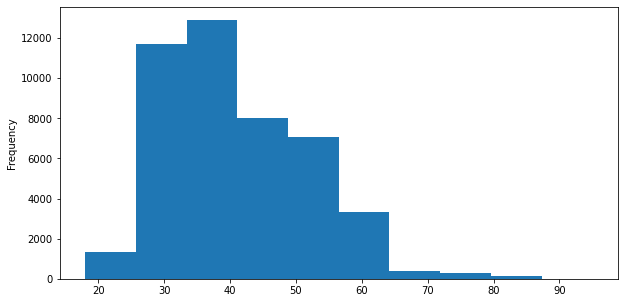

In [77]:
#plot the histogram of age variable.
plt.figure(figsize = [10,5])
df.age.plot.hist()
plt.show()

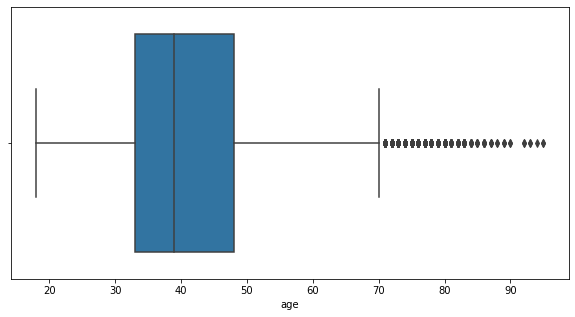

In [78]:
#plot the boxplot of age variable.
plt.figure(figsize = [10,5])
sns.boxplot(df.age)
plt.show()

Insights:


#### Salary variable 

In [79]:
#describe the salary variable of inp1.


In [80]:
#plot the boxplot of salary variable.


#### Balance variable 

In [81]:
#describe the balance variable
df.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

balance in Negative, something is fishy

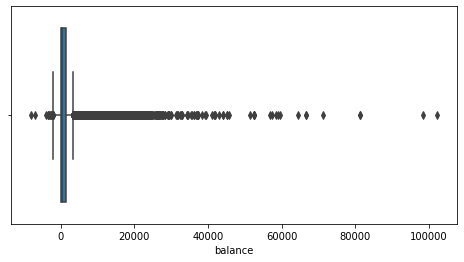

In [82]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,4])
sns.boxplot(df.balance)
plt.show()

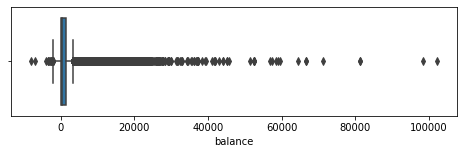

In [83]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,2])
sns.boxplot(df.balance)
plt.show()

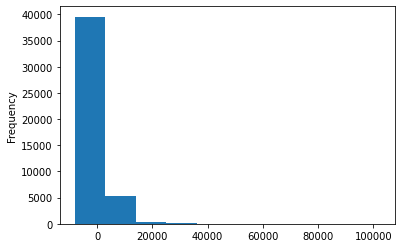

In [84]:
df.balance.plot.hist()

In [85]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable

df.balance.quantile([.5,.7,.9, .95, .99])


0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

So based on the histogram, boxplot, and 99% quantile value, lets analyse the records which are above 13173 balance. For more accurate we can take a standard value of 15000.

In [86]:
df[df.balance > 15000]. describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


Seeing these values, its clear that people with High salary or maybe business owners are in this range of people maintaining high balance!. But there are chances of this impacting our analysis, so on use case basis we can keep the range limited to 99 percentile.

In [87]:
df[df.balance < 0]. describe()

,age,salary,balance,day,campaign,pdays,previous
count,3758.000000,3758.000000,3758.000000,3758.000000,3758.000000,487.000000,3758.000000
mean,39.467270,54129.590208,-317.028206,16.443055,2.919106,279.094456,0.407131
std,9.065513,29983.137349,367.579973,8.578115,3.456233,93.657194,1.610873
min,20.000000,0.000000,-8019.000000,1.000000,1.000000,2.000000,0.000000
25%,32.000000,20000.000000,-421.750000,9.000000,1.000000,206.000000,0.000000
50%,38.000000,60000.000000,-230.000000,16.000000,2.000000,308.000000,0.000000
75%,46.000000,70000.000000,-93.000000,24.000000,3.000000,350.000000,0.000000
max,63.000000,120000.000000,-1.000000,31.000000,43.000000,670.000000,25.000000


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [88]:
#describe the duration variable of inp1
df.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [89]:
#convert the duration variable into single unit i.e. Seconds. and remove the sec or min prefix.

df.duration =df.duration.apply(
    lambda x: 
    float(x.split()[0])*60 if x.find("min")>0
    else float(x.split()[0])
    )



In [90]:
df.duration.describe()

count    45161.000000
mean       258.166427
std        257.587748
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

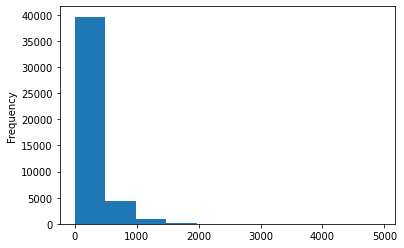

In [91]:
#describe the duration variable


df.duration.plot.hist()


In [92]:
df.duration.quantile([.25,.50, .75,.99])


0.25     103.0
0.50     180.0
0.75     319.0
0.99    1269.8
Name: duration, dtype: float64

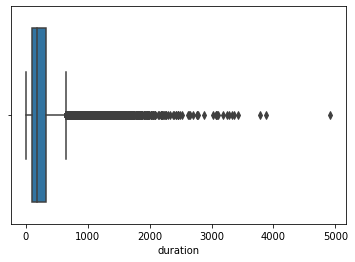

In [93]:
sns.boxplot(df.duration)

In [94]:
dur = df.duration.quantile([.25,.50, .75,.99])
dur


0.25     103.0
0.50     180.0
0.75     319.0
0.99    1269.8
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [95]:
df.marital.value_counts()

married     27185
single      12778
divorced     5198
Name: marital, dtype: int64

In [96]:
#calculate the percentage of each marital status category. 
df.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

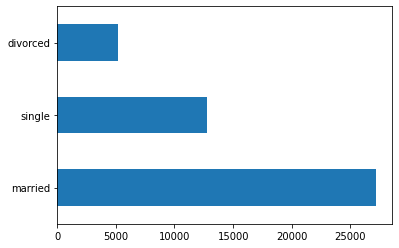

In [97]:
#plot the bar graph of percentage marital status categories
df.marital.value_counts().plot.barh()
plt.show()

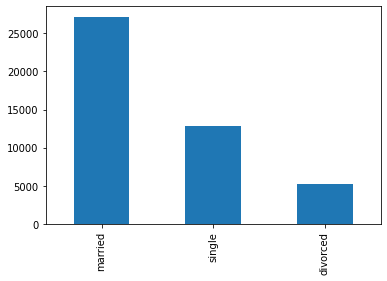

In [98]:
df.marital.value_counts().plot.bar()
plt.show()

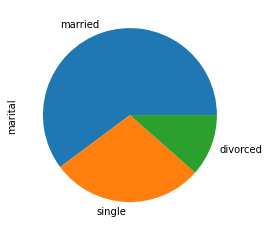

In [99]:
df.marital.value_counts().plot.pie()
plt.show()

#### Job  

In [100]:
df.job.value_counts()

blue-collar      9722
management       9451
technician       7589
admin.           5165
services         4148
retired          2262
self-employed    1574
entrepreneur     1484
unemployed       1302
housemaid        1238
student           938
unknown           288
Name: job, dtype: int64

In [101]:
#calculate the percentage of each job status category.
df.job[~ (df.job== "unknown")].value_counts(normalize = True)

blue-collar      0.216656
management       0.210617
technician       0.169122
admin.           0.115103
services         0.092439
retired          0.050409
self-employed    0.035077
entrepreneur     0.033071
unemployed       0.029015
housemaid        0.027589
student          0.020903
Name: job, dtype: float64

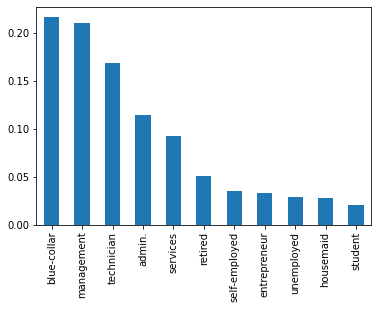

In [102]:
#plot the bar graph of percentage job categories
df.job[~ (df.job== "unknown")].value_counts(normalize = True).plot.bar()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [103]:
#calculate the percentage of each education category.


In [104]:
#plot the pie chart of education categories


#### poutcome 

In [105]:
#calculate the percentage of each poutcome category.


#### Response the target variable 

In [106]:
#calculate the percentage of each response category.


In [107]:
#plot the pie chart of response categories


## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

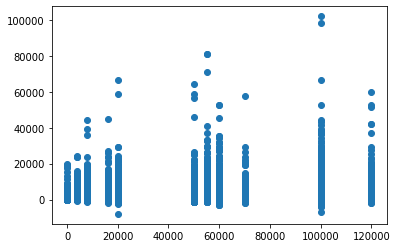

In [108]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(df.salary, df.balance)

In [109]:
#plot the scatter plot of balance and age variable in inp1


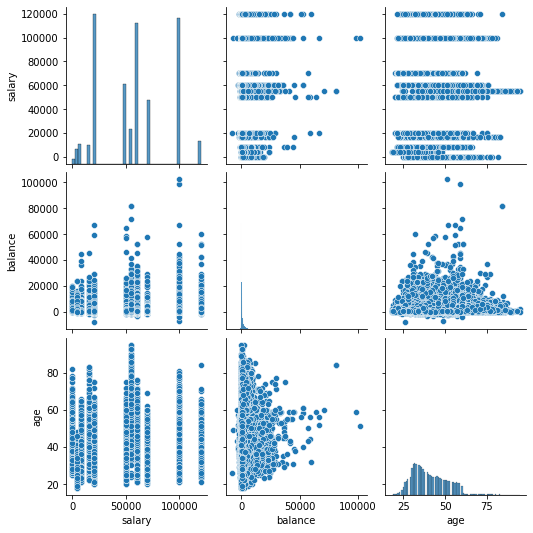

In [110]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data = df, vars=['salary', "balance", "age"])

#### Correlation heat map 

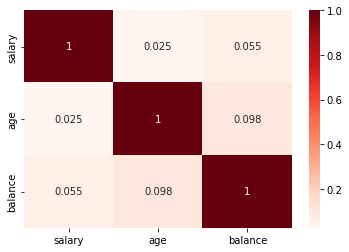

In [111]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(df[['salary',"age", "balance"]].corr(),annot = True,cmap ='Reds')
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [112]:
#groupby the response to find the mean of the salary with response no & yes seperatly.


In [113]:
#groupby the response to find the median of the salary with response no & yes seperatly.


In [114]:
#plot the box plot of salary for yes & no responses.


#### Balance vs response 

In [115]:
#plot the box plot of balance for yes & no responses.


In [116]:
#groupby the response to find the mean of the balance with response no & yes seperatly.


In [117]:
#groupby the response to find the median of the balance with response no & yes seperatly.


##### 75th percentile 

In [118]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [119]:
#calculate the mean, median and 75th percentile of balance with response


In [120]:
#plot the bar graph of balance's mean an median with response.


#### Education vs salary 

In [121]:
#groupby the education to find the mean of the salary education category.


In [122]:
#groupby the education to find the median of the salary for each education category.


#### Job vs salary

In [123]:
#groupby the job to find the mean of the salary for each job category.


### Segment- 5, Categorical categorical variable 

In [124]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0


#### Education vs response rate

In [125]:
#calculate the mean of response_flag with different education categories.


#### Marital vs response rate 

In [126]:
#calculate the mean of response_flag with different marital status categories.


In [127]:
#plot the bar graph of marital status with average value of response_flag


#### Loans vs response rate 

In [128]:
#plot the bar graph of personal loan status with average value of response_flag


#### Housing loans vs response rate 

In [129]:
#plot the bar graph of housing loan status with average value of response_flag


#### Age vs response 

In [130]:
#plot the boxplot of age with response_flag


##### making buckets from age columns 

In [131]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.


In [132]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.


In [133]:
#plot the bar graph of job categories with response_flag mean value.


### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [134]:
#create heat map of education vs marital vs response_flag


#### Job vs marital vs response 

In [135]:
#create the heat map of Job vs marital vs response_flag.


#### Education vs poutcome vs response

In [136]:
#create the heat map of education vs poutcome vs response_flag.


# Some Code Samples




In [3]:
### Standardization: Conversion of all data in column to a single standards. For example: if data are in minutes and seconds, then converting all to either second or minutes

##### convert the duration variable into single unit i.e. Seconds. and remove the sec or min prefix.

df.duration =df.duration.apply(
    lambda x: 
    float(x.split()[0])*60 if x.find("min")>0
    else float(x.split()[0])
    )




In [4]:
### Split a column on Delimiter 


##### Extract job in newly created 'job' column from "jobedu" column.

df['job']= df.jobedu.apply(lambda x: x.split(",")[0])


## Univariate Analysis & Data Quality Check for Categorical

In [5]:
#### Frequency Count
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
#### Column Description
df.job.describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [7]:
#### Percentage Count
df.job.value_counts(normalize = True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

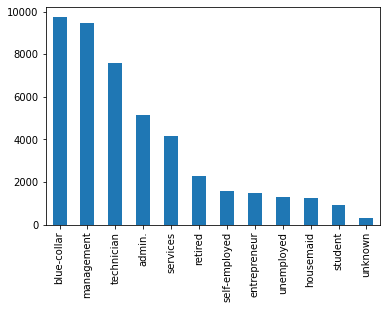

In [8]:
#### Bar Plot
df.job.value_counts().plot.bar()

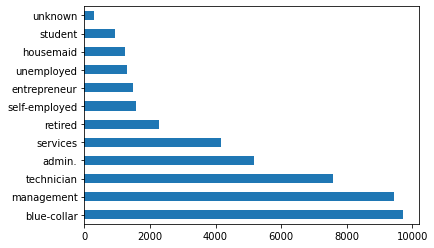

In [9]:
#### Horizontal Bar Plot
df.job.value_counts().plot.barh()

## Univariate Analysis & Data Quality Check for Numerical

In [25]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

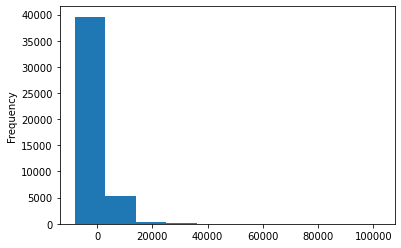

In [10]:
#### Histogram (For Numerical)
df.balance.plot.hist()

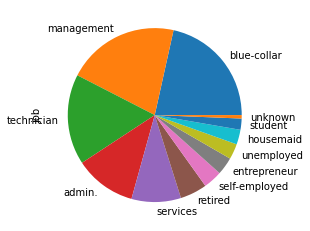

In [11]:
#### Pie Chart
df.job.value_counts().plot.pie()

In [12]:
#### Percentile / Quantile

df.salary.quantile([.25,.50,.60,.75,.90])

0.25     20000.0
0.50     60000.0
0.60     60000.0
0.75     70000.0
0.90    100000.0
Name: salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


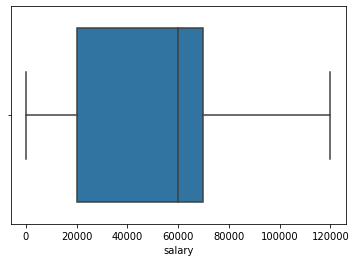

In [13]:
#### Box Plot
sns.boxplot(df.salary)

## MultiVariate Analysis
**Correlation doesn't imply causation**


* Scatter Plot - for 2 Numerical variables.

* Pairplot - For all aor a set of numerical variables.

* Correlation -  To find numerical correlation between numerical variables (for one or all)

* Heatmap - to identify and plot the correlation with color density ranging between -1 to 1

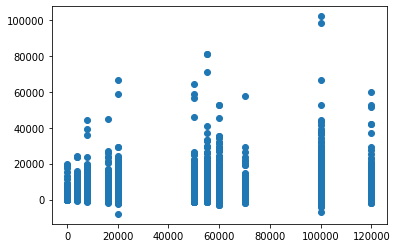

In [14]:
#### Scatter Plot

plt.scatter(df.salary, df.balance)

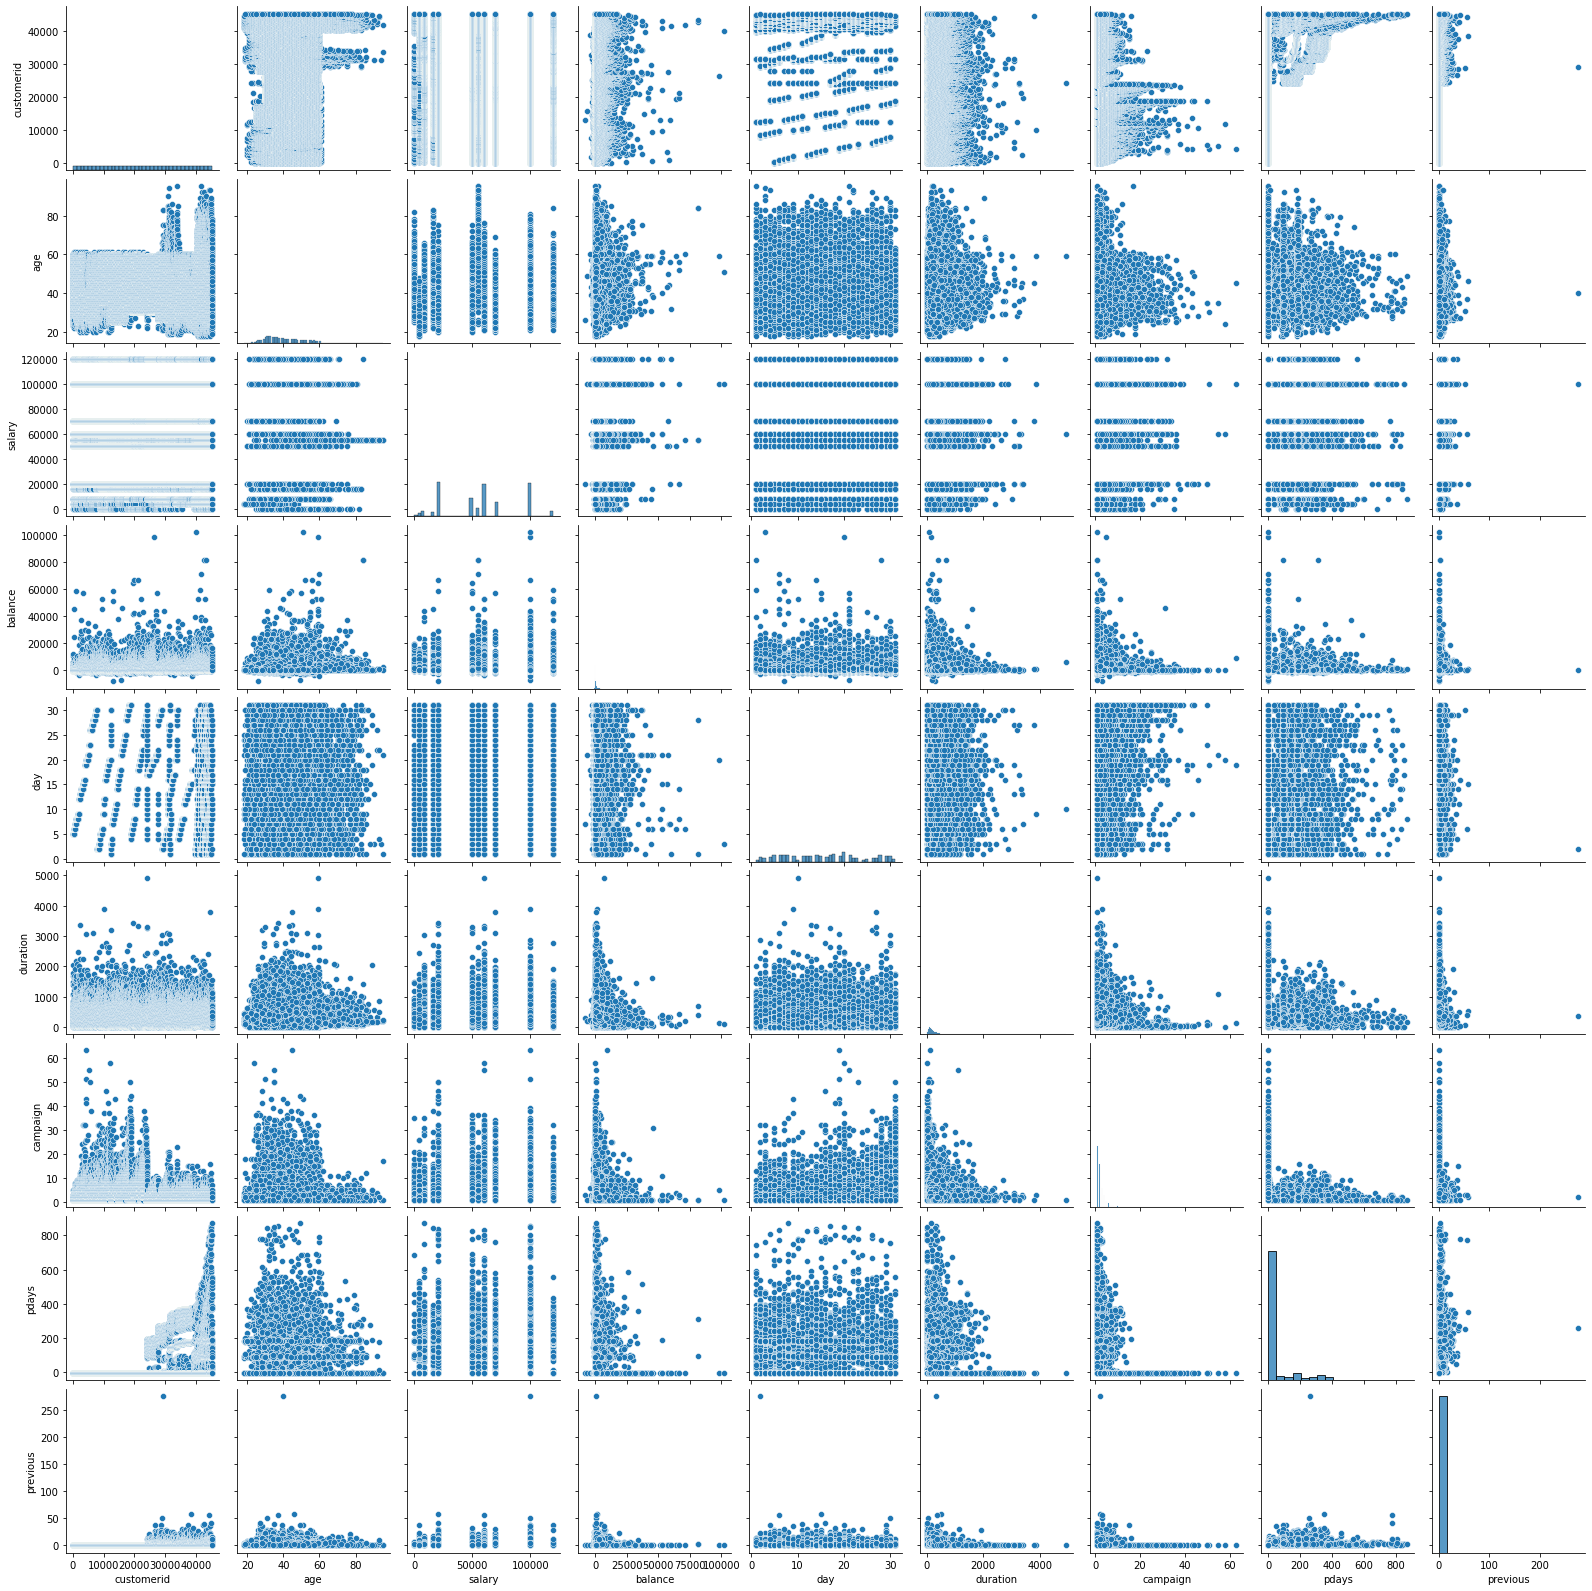

In [15]:
#### Pair Plot
sns.pairplot(df)

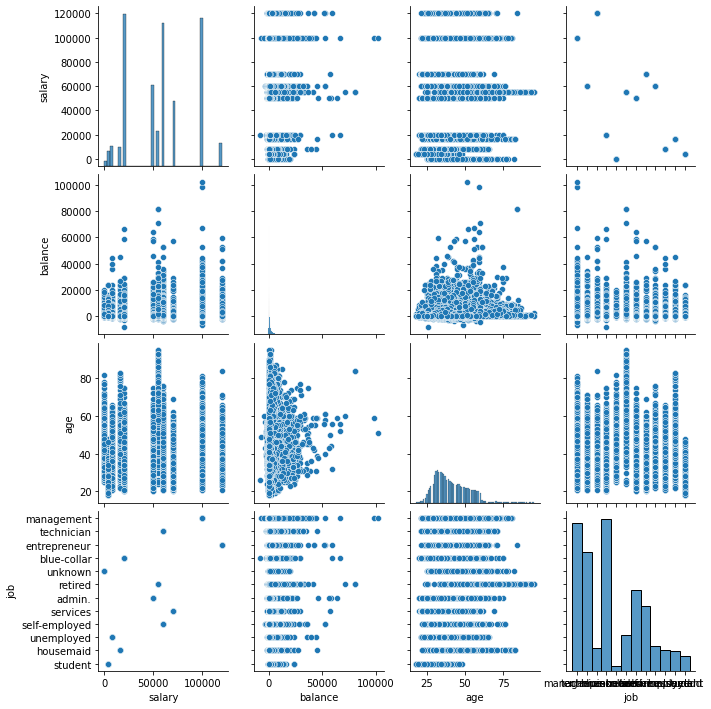

In [16]:
#### Pair Plot for a set of Variables
sns.pairplot(df, vars = ["salary", "balance","age", "job"])

In [17]:
df.corr()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
customerid,1.000000,0.014906,0.039966,0.073639,-0.061465,0.013031,-0.102884,0.437729,0.271098
age,0.014906,1.000000,0.024374,0.097755,-0.009184,-0.004658,0.004851,-0.023783,0.001330
salary,0.039966,0.024374,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.073639,0.097755,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.061465,-0.009184,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,0.013031,-0.004658,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.102884,0.004851,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.437729,-0.023783,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.271098,0.001330,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


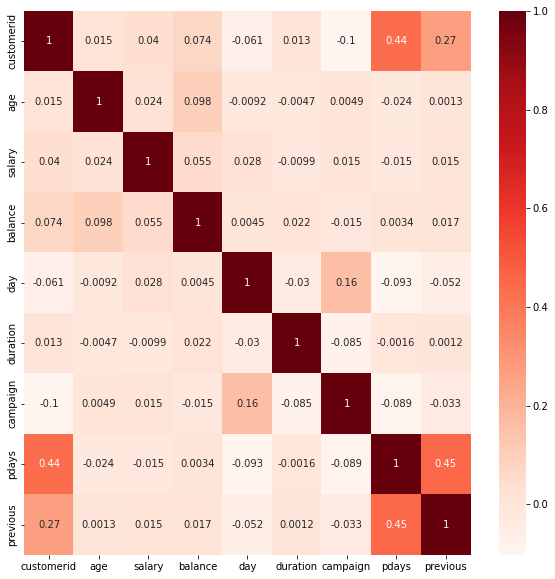

In [18]:
#### Correlation Matrix used for only numerical to numerical

plt.figure(figsize = [10,10])
sns.heatmap(df.corr(),annot=True,cmap='Reds')


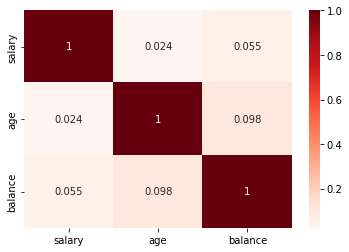

In [19]:
##### plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(df[['salary',"age", "balance"]].corr(),annot = True,cmap ='Reds')
plt.show()

### Numerical - Categorical

In [20]:
#### Check Grouped Column

In [42]:
df.groupby("response")["salary"].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [43]:
df.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

In [47]:

df.groupby('response')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39894.0,1304.094525,2975.033811,-8019.0,58.0,417.0,1345.0,102127.0
yes,5287.0,1804.832041,3501.645424,-3058.0,210.5,733.0,2159.5,81204.0


In [45]:
##### We can also create percentile function to be used as per requirement

def p25(x):
  return np.quantile(x,0.25)
def p50(x):
  return np.quantile(x,0.5)
def p75(x):
  return np.quantile(x,0.75)


<function p25 at 0x7f4ff4036e60>


In [46]:

df.groupby('response')['balance'].aggregate(['mean',p25,'median', p75])


,mean,p25,median,p75
response,,,,
no,1304.094525,58.0,417.0,1345.0
yes,1804.832041,210.5,733.0,2159.5


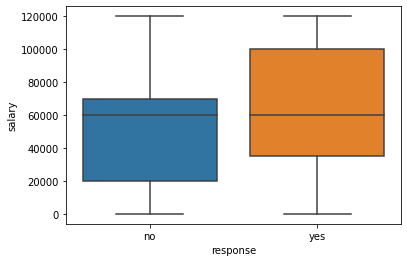

In [30]:
#### BOX Plot
sns.boxplot(data=df, x='response', y='salary')

In [22]:
#### Bar Plot

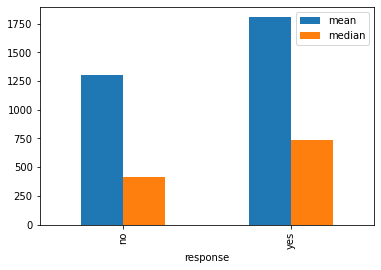

In [41]:
df.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()

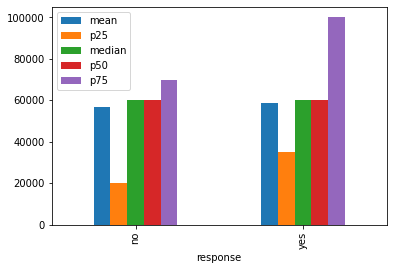

In [39]:
df.groupby('response')['balance'].aggregate(['mean',p25,'median', p75]).plot.bar()

### Categorical - Categorical Multivariate


In [49]:
df['resp_flag'] = np.where(df.response == 'yes',1,0)

In [53]:
df.resp_flag.value_counts()


0    39924
1     5287
Name: resp_flag, dtype: int64

In [55]:
df.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [52]:
df.resp_flag.describe()

count    45211.000000
mean         0.116941
std          0.321353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: resp_flag, dtype: float64

In [ ]:
df.resp_flag.mean()

In [61]:
df.groupby(['marital','loan'])['resp_flag'].mean()

marital   loan
divorced  no      0.129491
          yes     0.072747
married   no      0.110136
          yes     0.057940
single    no      0.158533
          yes     0.088394
Name: resp_flag, dtype: float64

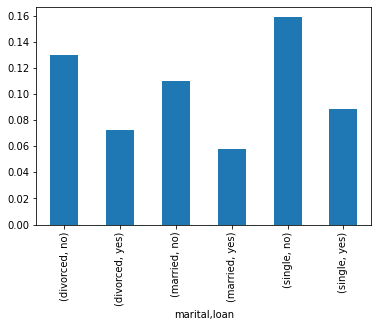

In [69]:
df.groupby(['marital','loan'])['resp_flag'].mean().plot.bar()

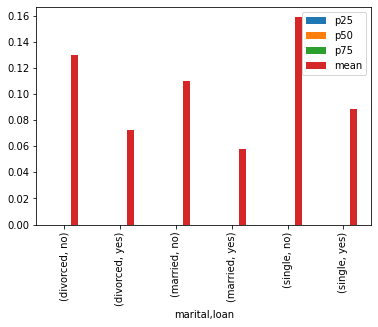

In [66]:
df.groupby(['marital','loan'])['resp_flag'].aggregate([p25, p50, p75, 'mean']).plot.bar()

In [64]:
df.groupby(['marital','loan'])['resp_flag'].aggregate([p25, p50, p75, 'mean'])

p25  p50  p75      mean
marital  loan                         
divorced no    0.0  0.0  0.0  0.129491
         yes   0.0  0.0  0.0  0.072747
married  no    0.0  0.0  0.0  0.110136
         yes   0.0  0.0  0.0  0.057940
single   no    0.0  0.0  0.0  0.158533
         yes   0.0  0.0  0.0  0.088394

## Binning


In [81]:
df['age_bins'] = pd.cut(
    df.age,
    [0,30,40,50,60,999],
    labels = ['<30','30-40','40-50','50-60','60+']
)

In [87]:
df.age_bins.value_counts(normalize = True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age, dtype: float64

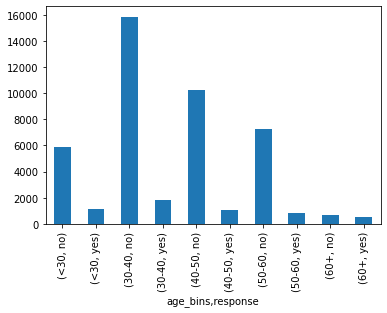

In [88]:
df.groupby(['age_bins'])['response'].value_counts().plot.bar()

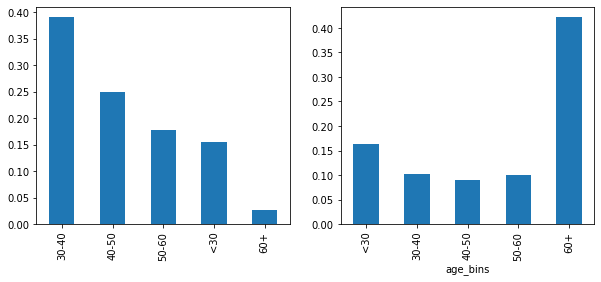

In [101]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
df.age_bins.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
df.groupby(['age_bins'])['resp_flag'].mean().plot.bar()

## Pivot Table & HeatMap for Categorical to Categorical

In [117]:
job_age = pd.pivot_table(data = df,
                             index = 'job',
                             columns = ['age_bins'],
                             values = 'resp_flag'
                             )

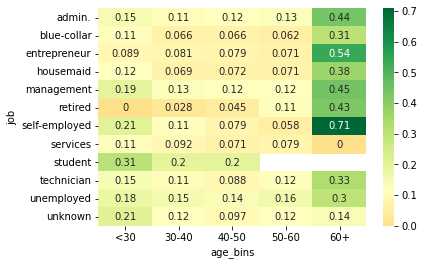

In [118]:
sns.heatmap(job_age,
            annot = True,
            cmap = 'RdYlGn',
            center = 0.117    
)

# End
